In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

STEPS:
1. Data overview
2. Brief cleaning (filtering, changing col types, removing features, adding features)
3. EDA (visualizations)
4. Splitting data
5. Data preprocessing (imputing, encoding, transforming)
6. Modeling

In [19]:
df = pd.read_csv('vehicles.csv', index_col='id')

In [20]:
df.head(10)

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN


In [21]:
print("Shape of dataset:")
display(df.shape)
display(df.info())

Shape of dataset:


(426880, 25)

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           426880 non-null  object 
 1   region        426880 non-null  object 
 2   region_url    426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          425675 non-null  float64
 5   manufacturer  409234 non-null  object 
 6   model         421603 non-null  object 
 7   condition     252776 non-null  object 
 8   cylinders     249202 non-null  object 
 9   fuel          423867 non-null  object 
 10  odometer      422480 non-null  float64
 11  title_status  418638 non-null  object 
 12  transmission  424324 non-null  object 
 13  VIN           265838 non-null  object 
 14  drive         296313 non-null  object 
 15  size          120519 non-null  object 
 16  type          334022 non-null  object 
 17  paint_color   296677 non-null  object 
 

None

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,426880.0,75199.033187,1.218228e+07,0.000000,5900.000000,13950.0000,26485.750000,3.736929e+09
year,425675.0,2011.235191,9.452120e+00,1900.000000,2008.000000,2013.0000,2017.000000,2.022000e+03
odometer,422480.0,98043.331443,2.138815e+05,0.000000,37704.000000,85548.0000,133542.500000,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,38.493940,5.841533e+00,-84.122245,34.601900,39.1501,42.398900,8.239082e+01
long,420331.0,-94.748599,1.836546e+01,-159.827728,-111.939847,-88.4326,-80.832039,1.738855e+02


In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(426880, 25)

In [25]:
df.nunique()

url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

,missing_count,missing_percentage
county,426880,100.00
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93


Text(0.5, 1.0, 'Features missing percentage')

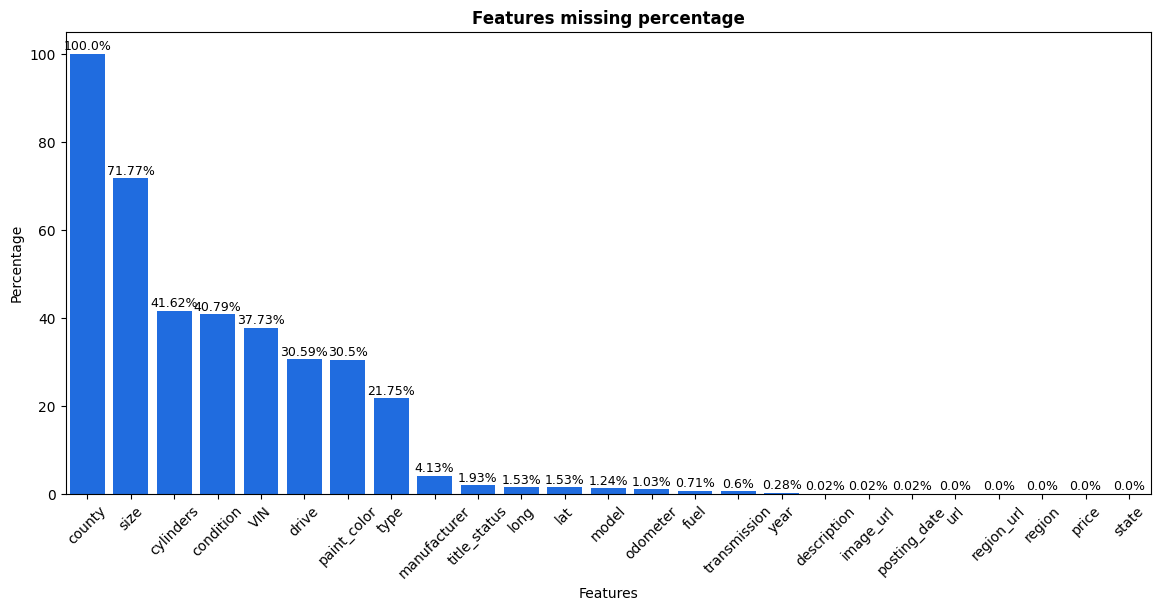

In [26]:
missing_vals = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['missing_count'])
missing_vals['missing_percentage'] = (missing_vals['missing_count']/df.shape[0])*100
missing_vals['missing_percentage'] = missing_vals['missing_percentage'].round(2)
display(missing_vals)

plt.figure(figsize=(14,6))
sns.barplot(data=missing_vals, x=missing_vals.index, y='missing_percentage', color="#0066FF")
plt.xticks(rotation=45)
for i, val in enumerate(missing_vals['missing_percentage']):
    plt.text(i, val + 0.2, f"{val}%", ha='center', va='bottom', fontsize=9)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Features missing percentage', fontweight='bold')

In [27]:
cols_to_remove = ['url', 'region_url', 'VIN', 'size', 'paint_color', 'image_url', 'description', 'county', 'lat', 'long', 'state']
df = df.drop(columns=cols_to_remove)

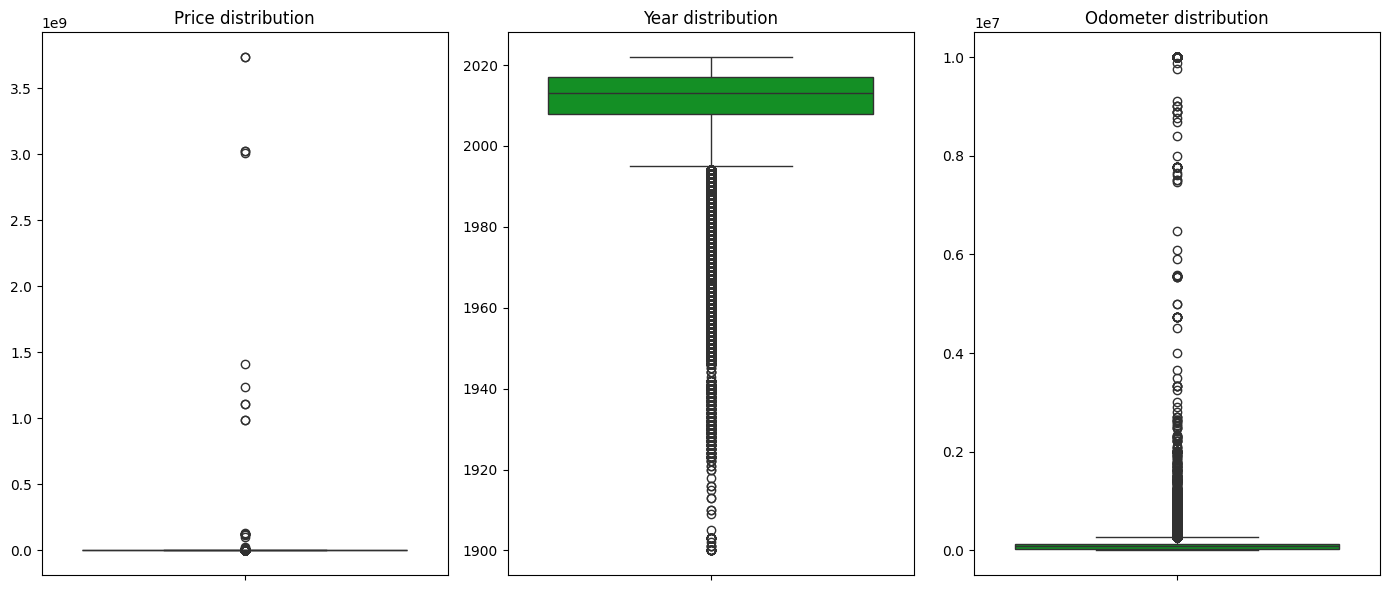

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))

f = ['price', 'year', 'odometer']

for i in range(len(f)):
    sns.boxplot(y=df[f[i]], ax=ax[i], color="#00A316")
    ax[i].set_title(f'{f[i].capitalize()} distribution')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

- Price distribution - We see some extreme outliers with few cars costing around $1 billion and one is even above $3.5 billions so we will remove those outliers causing skewness
- Year distribution - Pretty normal, few older cars, probably veterans, not considered as cars for everyday buying
- Odometer distribution - Few odometers showing 1.0 x 10^7 mileage, so either invalid values/typos or very used cars causing skewness

- Nemuric features cleaning and preprocessing

In [30]:
#Filtering car by price, odometer and year
df = df[
    (df['price'].between(100, 150000)) &
    (df['year'] > 1980) &
    (df['odometer'] < 500000)
]

#Extracting cylinders values and converting it to float
df['cylinders'] = df['cylinders'].str.extract('(\d+)')
df['cylinders'] = df['cylinders'].astype('float')

#Changing car year type to int
df['year'] = df['year'].astype('int64')

#Extracting year when posted
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce', utc=True)
df['year_added'] = df['posting_date'].dt.year

#Adding how old is car feature
df['car_age'] = df['year_added'] - df['year']

df.drop(columns=['posting_date', 'year_added', 'year'], inplace=True)

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\2039661810.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['cylinders'] = df['cylinders'].str.extract('(\d+)')


In [31]:
df.head(10)

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,car_age
id,,,,,,,,,,,,,
7316814884,auburn,33590,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,clean,other,NaN,pickup,7
7316814758,auburn,22590,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,NaN,pickup,11
7316814989,auburn,39590,chevrolet,silverado 1500 crew,good,8.0,gas,19160.0,clean,other,NaN,pickup,1
7316743432,auburn,30990,toyota,tundra double cab sr,good,8.0,gas,41124.0,clean,other,NaN,pickup,4
7316356412,auburn,15000,ford,f-150 xlt,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,8
7316343444,auburn,27990,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696.0,clean,other,4wd,pickup,9
7316304717,auburn,34590,chevrolet,silverado 1500 double,good,6.0,gas,29499.0,clean,other,4wd,pickup,5
7316285779,auburn,35000,toyota,tacoma,excellent,6.0,gas,43000.0,clean,automatic,4wd,truck,2
7316257769,auburn,29990,chevrolet,colorado extended cab,good,6.0,gas,17302.0,clean,other,4wd,pickup,5


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377872 entries, 7316814884 to 7301591129
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        377872 non-null  object 
 1   price         377872 non-null  int64  
 2   manufacturer  365367 non-null  object 
 3   model         374177 non-null  object 
 4   condition     233156 non-null  object 
 5   cylinders     222781 non-null  float64
 6   fuel          375762 non-null  object 
 7   odometer      377872 non-null  float64
 8   title_status  370655 non-null  object 
 9   transmission  376365 non-null  object 
 10  drive         263437 non-null  object 
 11  type          298249 non-null  object 
 12  car_age       377872 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 40.4+ MB


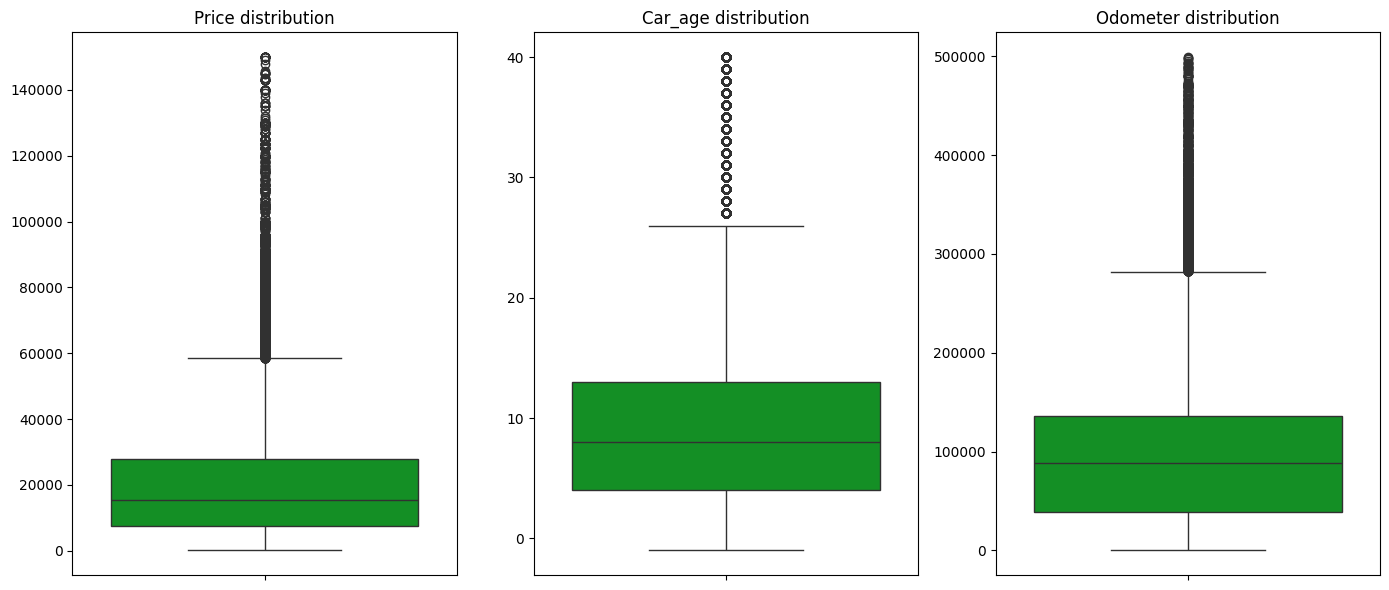

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))

f = ['price', 'car_age', 'odometer']

for i in range(len(f)):
    sns.boxplot(y=df[f[i]], ax=ax[i], color="#00A316")
    ax[i].set_title(f'{f[i].capitalize()} distribution')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()



- Even after filtering we see some outliers, but we will transform these later

In [ ]:
categorical = df.select_dtypes('object')
print(f'Unique values across features:\n{categorical.nunique()}')


Unique values across features:
region            404
manufacturer       42
model           25625
condition           6
fuel                5
title_status        6
transmission        3
drive               3
type               13
dtype: int64


C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\360720113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_count.index, y=top_count.values, ax=ax[i], palette='viridis')
C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\360720113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_count.index, y=top_count.values, ax=ax[i], palette='viridis')
C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\360720113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_count.index, y=top_count.values, ax=ax[i], palette='viridis')


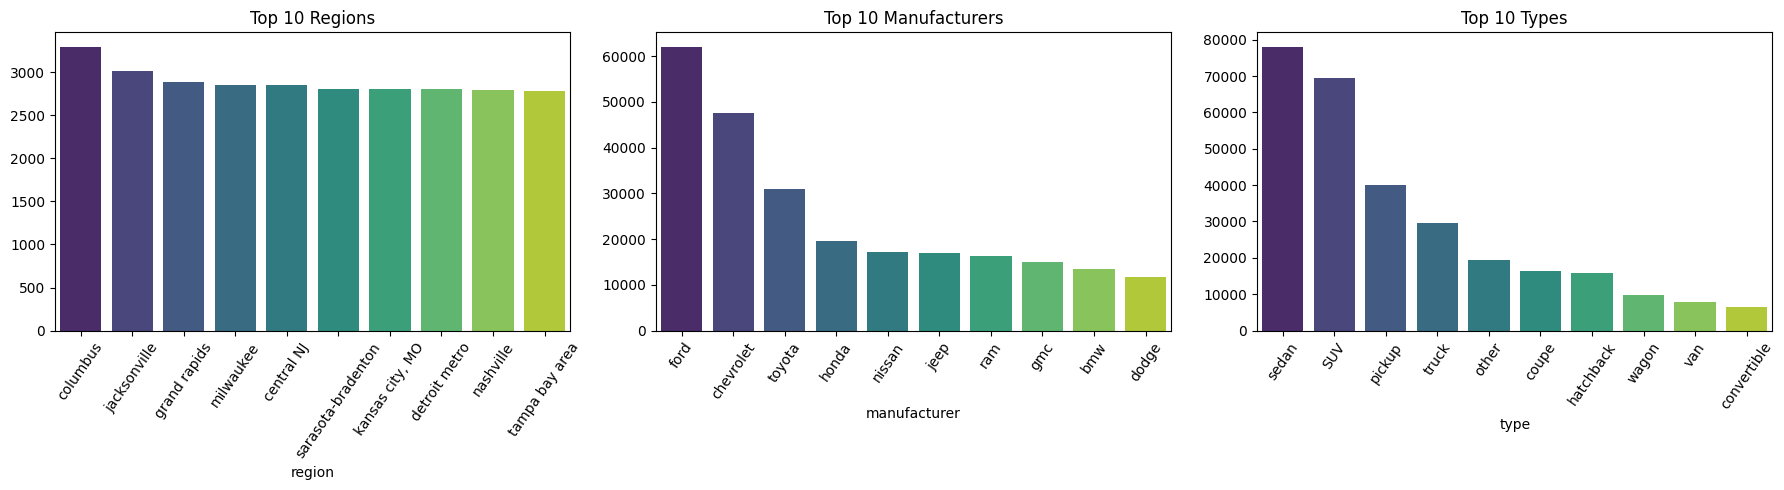

In [47]:
fig, ax = plt.subplots(1,3,figsize=(18,5))

features = ['region', 'manufacturer', 'type']

def top(x):
    return x.value_counts().sort_values(ascending=False)[:10]

for i, f in enumerate(features):
    top_count = top(df[f])
    sns.barplot(x=top_count.index, y=top_count.values, ax=ax[i], palette='viridis')
    ax[i].set_title(f'Top 10 {features[i].capitalize()}s')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', rotation=55)
    
plt.tight_layout()
plt.show()


- Keeping

In [ ]:
def keep_top_categories(x, threshold=0.80):
    val_counts = x.value_counts(normalize=True).cumsum()
    top_categories = val_counts[val_counts <= threshold].index
    return x.apply(lambda val: val if val in top_categories else 'other')


df['region'] = keep_top_categories(df['region'])
df['manufacturer'] = keep_top_categories(df['manufacturer'])
df['model'] = keep_top_categories(df['model'])

C:\Users\MSI\AppData\Local\Temp\ipykernel_26536\2673145071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='condition', y='price', palette='tab10')


Text(0.5, 1.0, 'Price per cars condition')

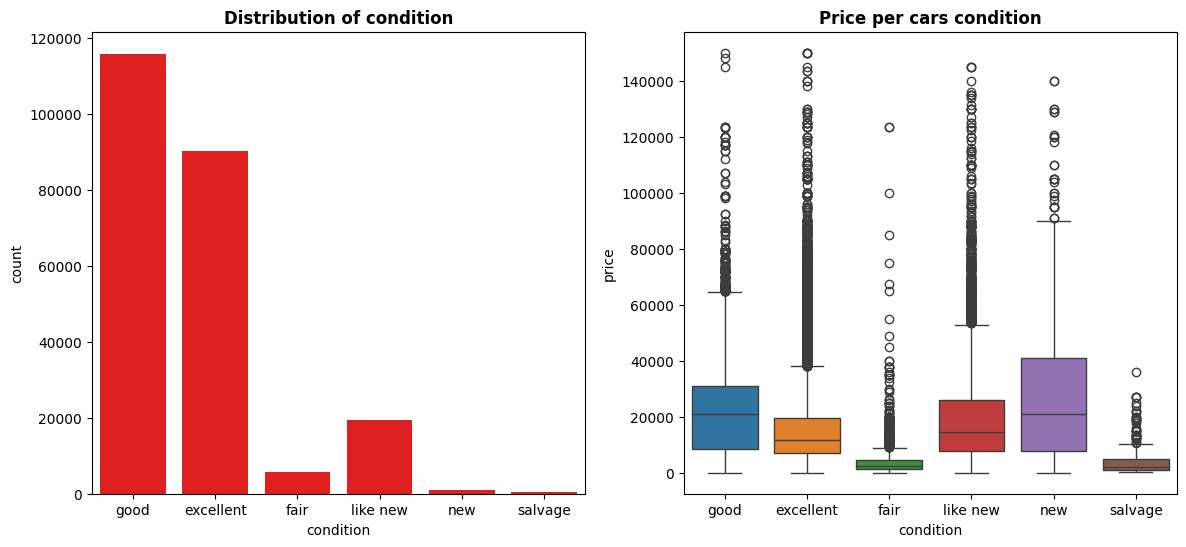

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

sns.countplot(data=df, x='condition', ax=ax[0], color='red')
ax[0].set_title('Distribution of condition', fontweight='bold')

sns.boxplot(data=df, x='condition', y='price', ax=ax[1], palette='tab10')
ax[1].set_title('Price per cars condition', fontweight='bold')


C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\1038029227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cylinders', y='price', palette='magma')


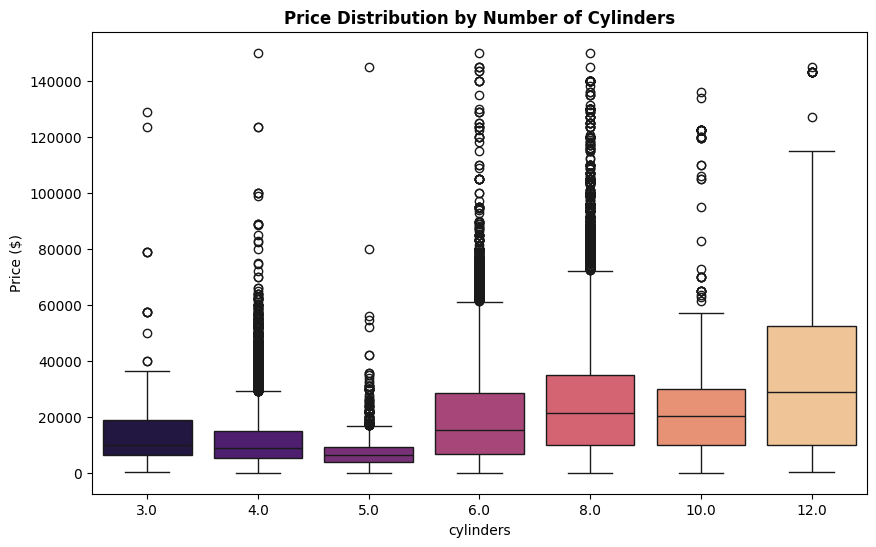

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cylinders', y='price', palette='magma')
plt.title('Price Distribution by Number of Cylinders', fontweight='bold')
plt.ylabel('Price ($)')
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\279530328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=f, y='price', ax=ax[i], palette='viridis')
C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\279530328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=f, y='price', ax=ax[i], palette='viridis')
C:\Users\MSI\AppData\Local\Temp\ipykernel_9800\279530328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=f, y='price', ax=ax[i], palette='viridis')


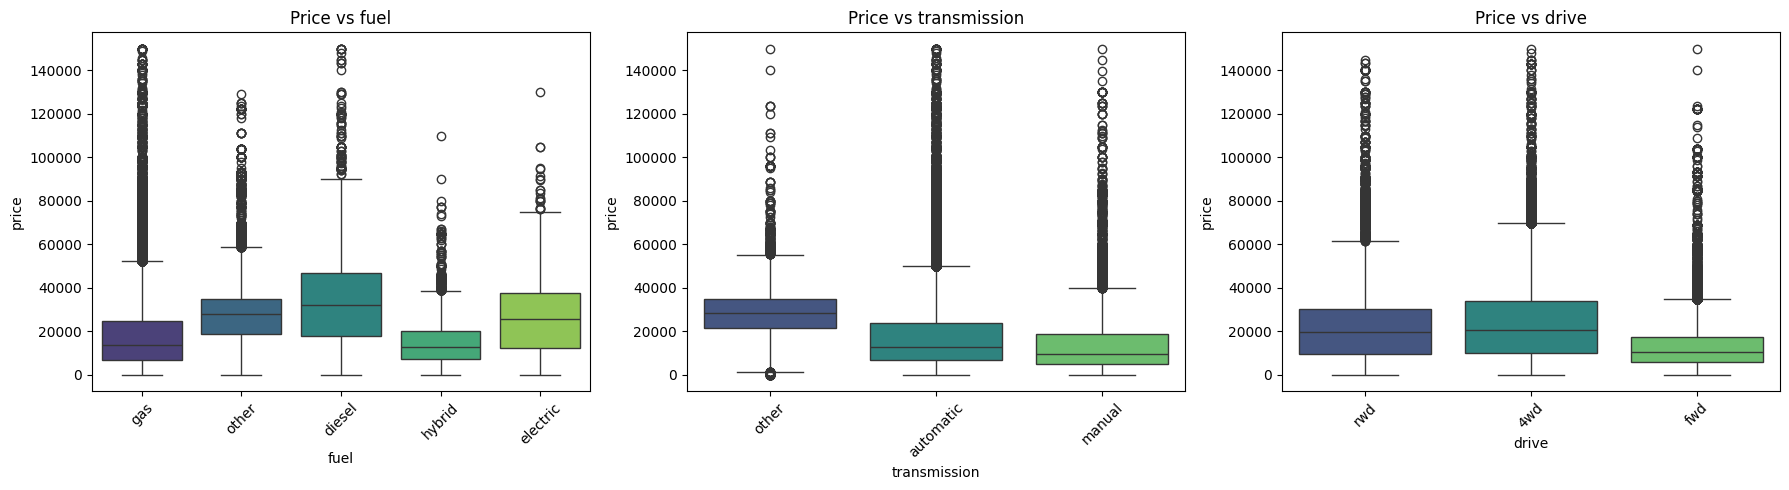

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

cat_features = ['fuel', 'transmission', 'drive']

for i, f in enumerate(cat_features):
    sns.boxplot(data=df, x=f, y='price', ax=ax[i], palette='viridis')
    ax[i].set_title(f'Price vs {f}')
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [49]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,car_age,odometer_bin
id,,,,,,,,,,,,,,
7316814884,auburn,33590,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,clean,other,NaN,pickup,7,"(49923.2, 99846.4]"
7316814758,auburn,22590,chevrolet,silverado 1500,good,8.0,gas,71229.0,clean,other,NaN,pickup,11,"(49923.2, 99846.4]"
7316814989,auburn,39590,chevrolet,silverado 1500 crew,good,8.0,gas,19160.0,clean,other,NaN,pickup,1,"(-499.232, 49923.2]"
7316743432,auburn,30990,toyota,tundra double cab sr,good,8.0,gas,41124.0,clean,other,NaN,pickup,4,"(-499.232, 49923.2]"
7316356412,auburn,15000,ford,f-150 xlt,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,8,"(99846.4, 149769.6]"


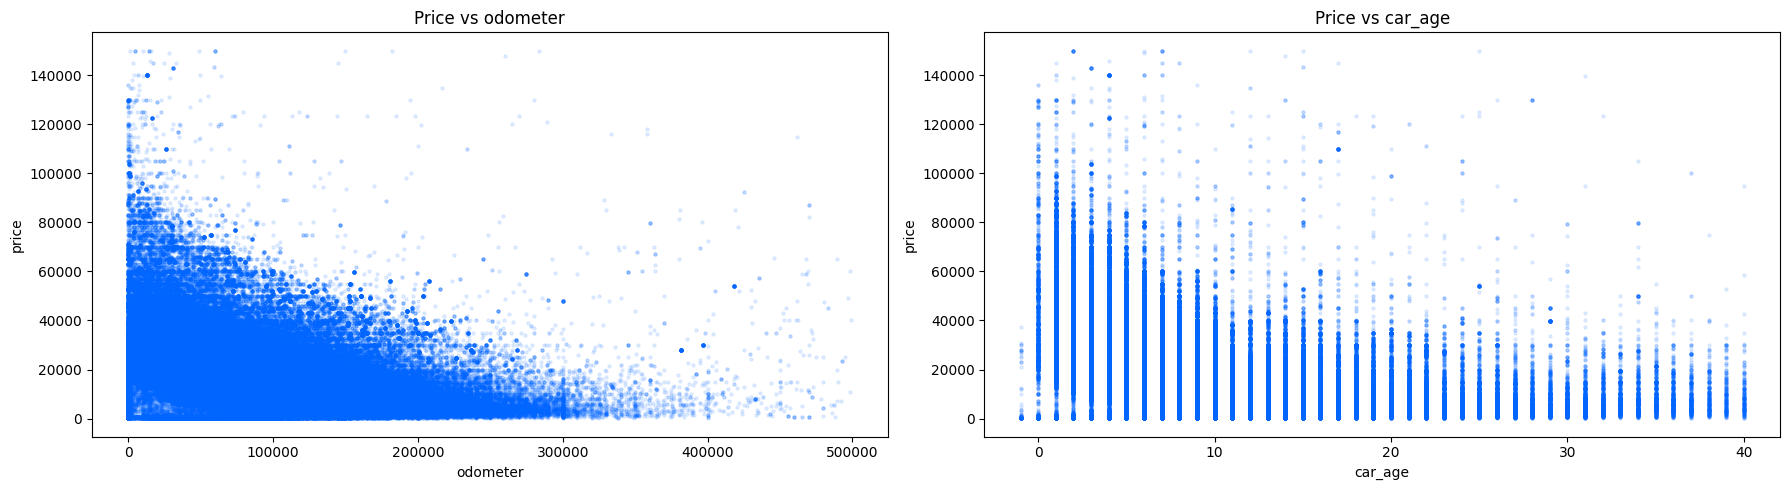

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

numeric_features = ['odometer', 'car_age']

for i, f in enumerate(numeric_features):
    ax[i].scatter(df[f], df['price'], alpha=0.1, color="#0066FF", s=5)
    ax[i].set_xlabel(f)
    ax[i].set_ylabel('price')
    ax[i].set_title(f'Price vs {f}')

plt.tight_layout()
plt.show()

<Axes: >

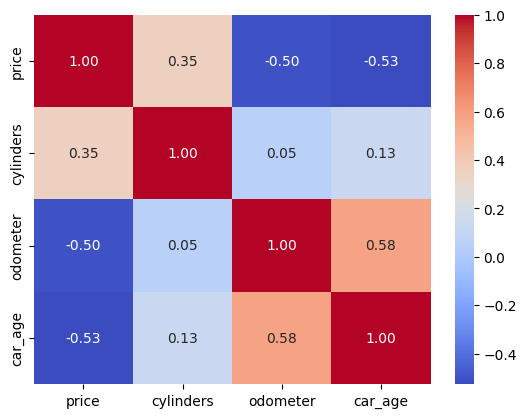

In [51]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')